In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from shapely.geometry import Point
#import geopandas as gpd

In [23]:
df = pd.read_excel('customer_churn.xlsx')

In [24]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [25]:
df.shape

(7043, 31)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [27]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


In [28]:
# Removing empty values from the total charges and replacing them with 0
# These are all new customers so we know the charges much currently be 0
# The NaN values haven't imported properly from excel

df['Total Charges'] = df['Total Charges'].replace(' ', 0.0)
df['Total Charges'] = df['Total Charges'].astype(float)

Analysis to see how a difference of monthly to total charges effects churn

In [45]:
# Function for excess bins

def excess_bins (x):
    if x >350:
        return 350
    elif x >300:
        return 300
    elif x >250:
        return 250
    elif x >200:
        return 200
    elif x >150:
        return 150
    elif x >100:
        return 100
    elif x >50:
        return 50
    elif x >0:
        return 0
    elif x >-50:
        return -50
    elif x >-100:
        return -100
    elif x >-150:
        return -150
    elif x >-200:
        return -200
    elif x >-250:
        return -250
    elif x >-300:
        return -300
    elif x >-350:
        return -350
    else:
        return -400


In [49]:
# Calculating the difference (excess) in monthly value to total value

df['excess'] = df['Total Charges'].sub(df['Tenure Months'].mul(df['Monthly Charges']))
df.groupby(['excess'])[['Churn Value']].mean().sort_values(by='excess', ascending=False)

,Churn Value
excess,
373.25,0.0
367.55,0.0
367.05,0.0
360.05,0.0
311.00,0.0
...,...
-347.80,0.0
-354.05,1.0
-355.35,1.0


In [47]:
#putting the excess into bins

df['excess_bins'] = df['excess'].apply(excess_bins)
df_excess_churn_con = df.groupby(['Contract', 'excess_bins'])[['Churn Value']].mean().sort_values(by='Churn Value',
                                                                                                  ascending=False)

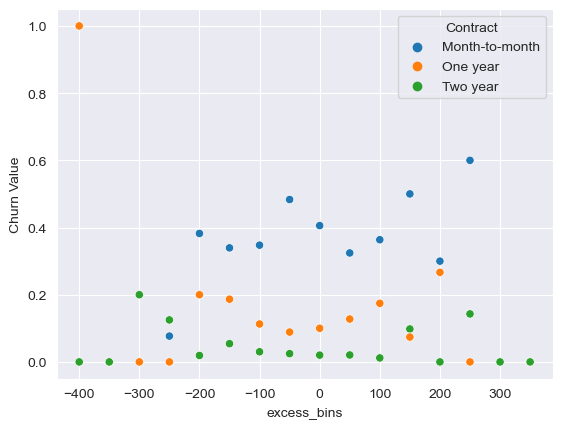

In [50]:
# Plotting to see how the excess charged affects churn given contract length

sns.scatterplot(data=df_excess_churn_con, y='Churn Value', x='excess_bins', hue='Contract')
plt.show()

Graphs to show the monthly charges, total charges and tenure months

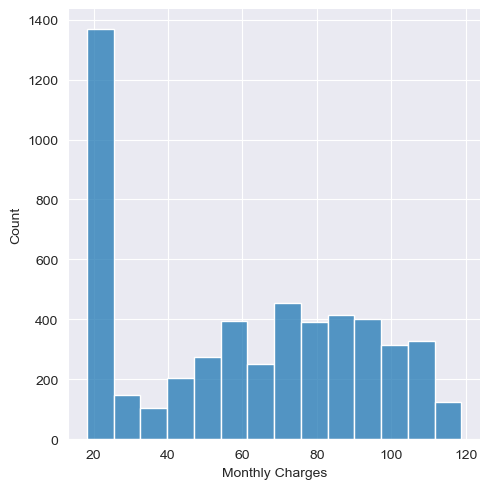

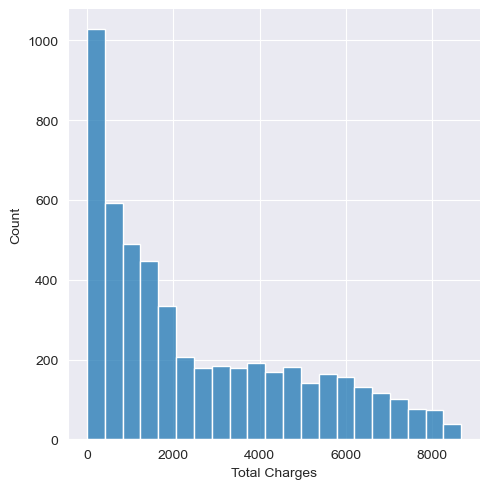

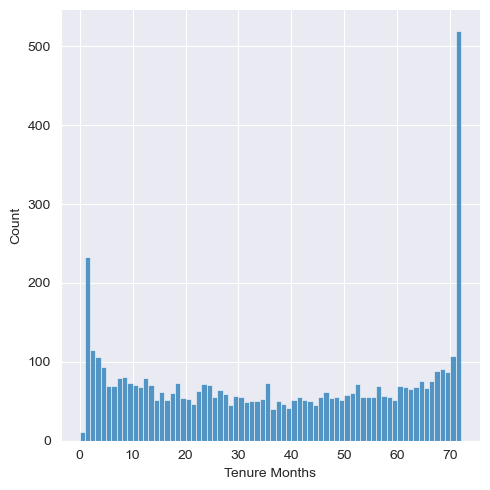

In [29]:
# for customers who have not churned

df_notchurn = df[(df['Churn Value'] == 0)]
sns.displot(df_notchurn['Monthly Charges'])
plt.show()
sns.displot(df_notchurn['Total Charges'])
plt.show()
sns.displot(df_notchurn['Tenure Months'], bins=72)
plt.show()

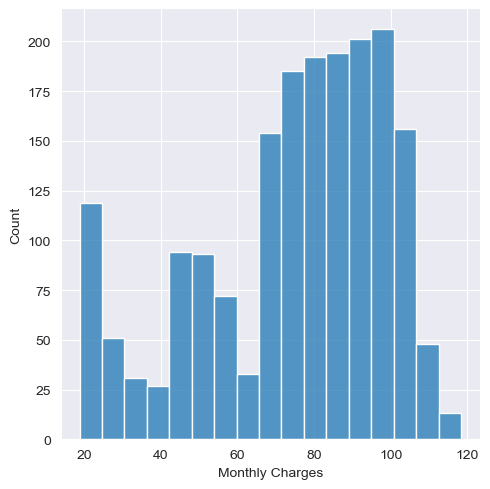

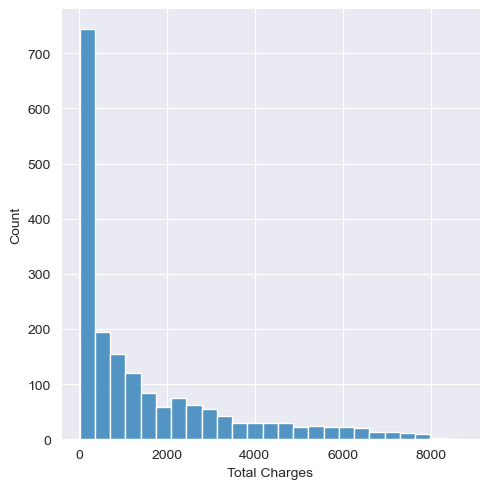

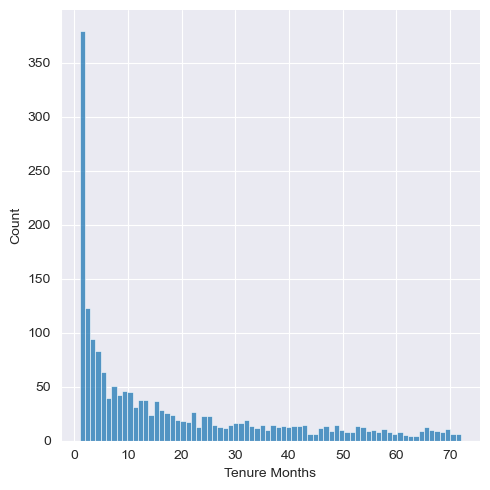

In [30]:
# for customers who have churned

df_churn = df[(df['Churn Value'] == 1)]
sns.displot(df_churn['Monthly Charges'])
plt.show()
sns.displot(df_churn['Total Charges'])
plt.show()
sns.displot(df_churn['Tenure Months'], bins=72)
plt.show()

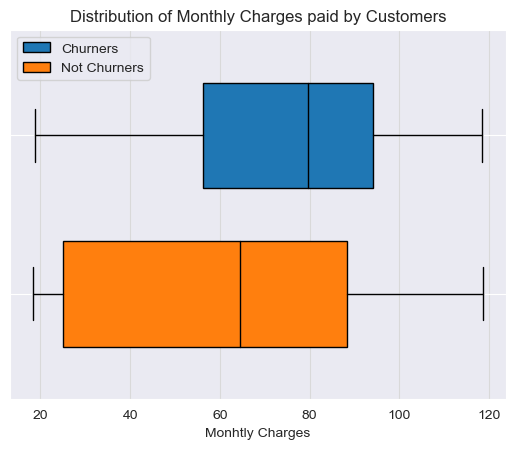

In [31]:
# Box plots to show the differences in monthly charges of customers who
# have churned and those who have not

fig_test, ax = plt.subplots()
box1 = ax.boxplot(data = df[df['Churn Value'] == 1],x='Monthly Charges',
                  positions=[0.75], widths=0.5, vert=False, patch_artist=True,
                  boxprops=dict(facecolor='tab:blue'), medianprops=dict(color='black'))
box2 = ax.boxplot(data = df[df['Churn Value'] == 0],x='Monthly Charges',
                  positions=[0], widths=0.5, vert=False, patch_artist=True,
                  boxprops=dict(facecolor='tab:orange'), medianprops=dict(color='black'))

ax.legend([box1["boxes"][0], box2["boxes"][0]],
          ["Churners", "Not Churners"], loc='upper left', frameon=True)

plt.xlabel('Monhtly Charges')
plt.tick_params(left=False, labelleft=False)
plt.grid(axis='x', color='0.85')
plt.title('Distribution of Monthly Charges paid by Customers')
plt.show()

Start on the EDA of only the customers who have churned

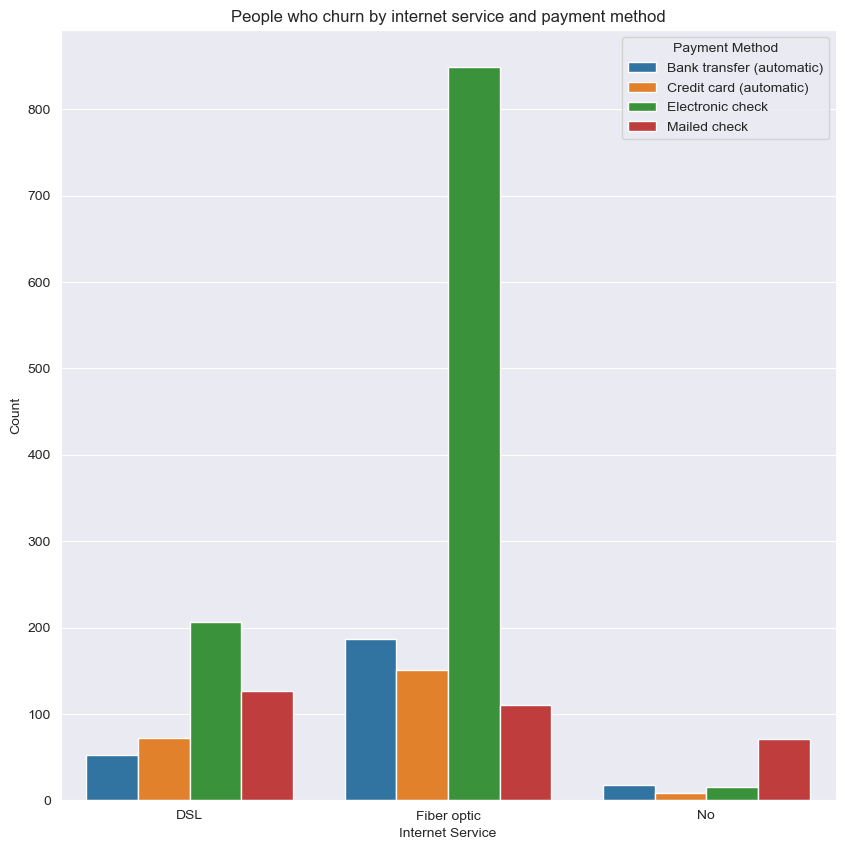

In [32]:
# People who churn by internet and payment service

df_int_fib = df.copy()
df_int_fib = df_int_fib[df_int_fib['Churn Value'] == 1]
df_int_fib = df_int_fib.groupby(['Internet Service', 'Payment Method'])[['Count']].sum()
df_int_fib
df_int_fib.reset_index(inplace=True)
plt.figure(figsize=(10, 10))
sns.barplot(data=df_int_fib, x="Internet Service", y="Count",
            hue='Payment Method').set(title='People who churn by internet service and payment method')

plt.show()

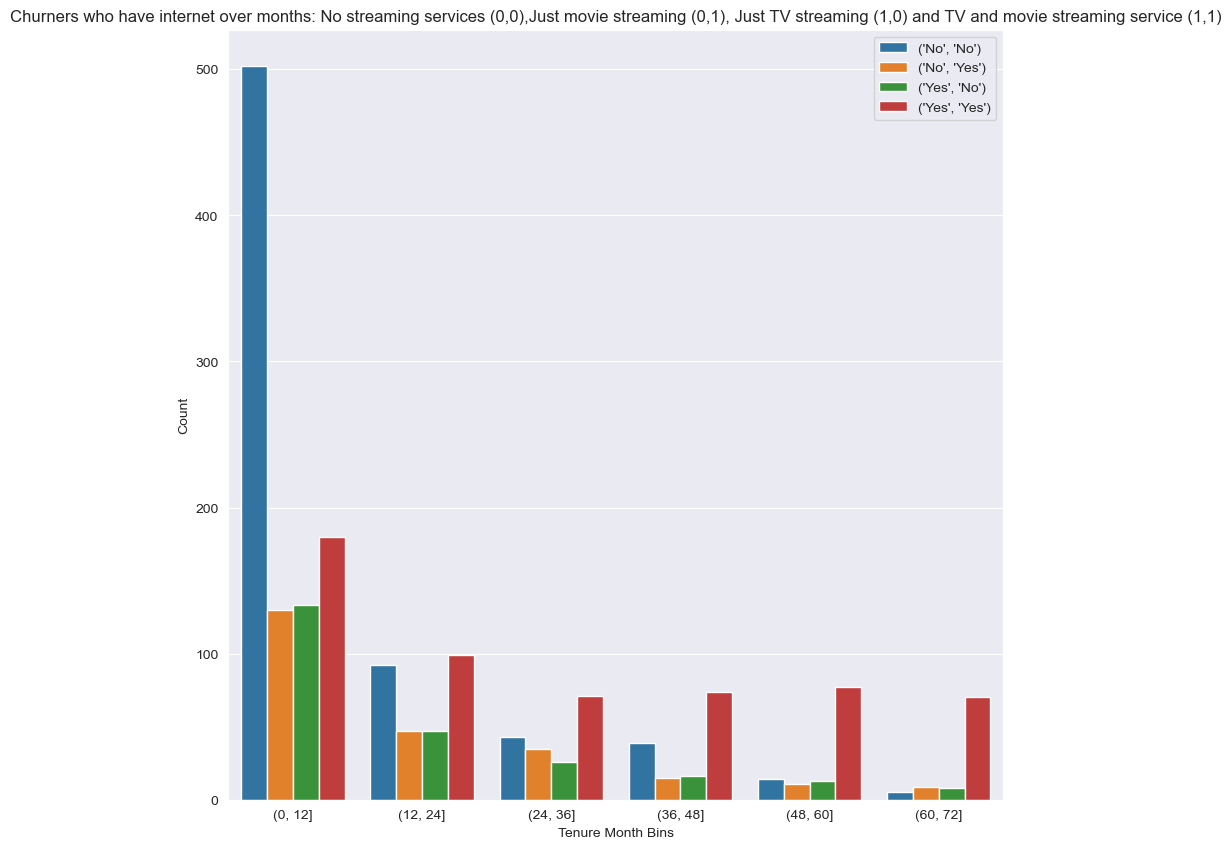

In [33]:
# internet service, have churned, analysis of streaming services
df_stream = df.copy()
df_stream = df_stream[df_stream['Internet Service']!='No']
df_stream = df_stream[df_stream['Churn Value']==1]
df_stream = df_stream.groupby(['Tenure Months','Streaming TV','Streaming Movies'])[['Count']].sum()
df_stream.reset_index(inplace=True)

bins = [0, 12, 24, 36, 48, 60, 72]
df_stream['Tenure Month Bins'] = pd.cut(df_stream['Tenure Months'], bins)

df_stream = df_stream.groupby(['Tenure Month Bins','Streaming TV','Streaming Movies'])[['Count']].sum()
df_stream.reset_index(inplace=True)
plt.figure(figsize=(10, 10))
labels=['No Movies or TV', 'Just Movies','Just TV','Movies and TV']
sns.barplot(data=df_stream, x="Tenure Month Bins", y="Count",
            hue=df_stream[['Streaming TV','Streaming Movies']].apply(tuple, axis=1)).set(title = 'Churners who have internet over months: No streaming services (0,0),Just movie streaming (0,1), Just TV streaming (1,0) and TV and movie streaming service (1,1)')


plt.show()

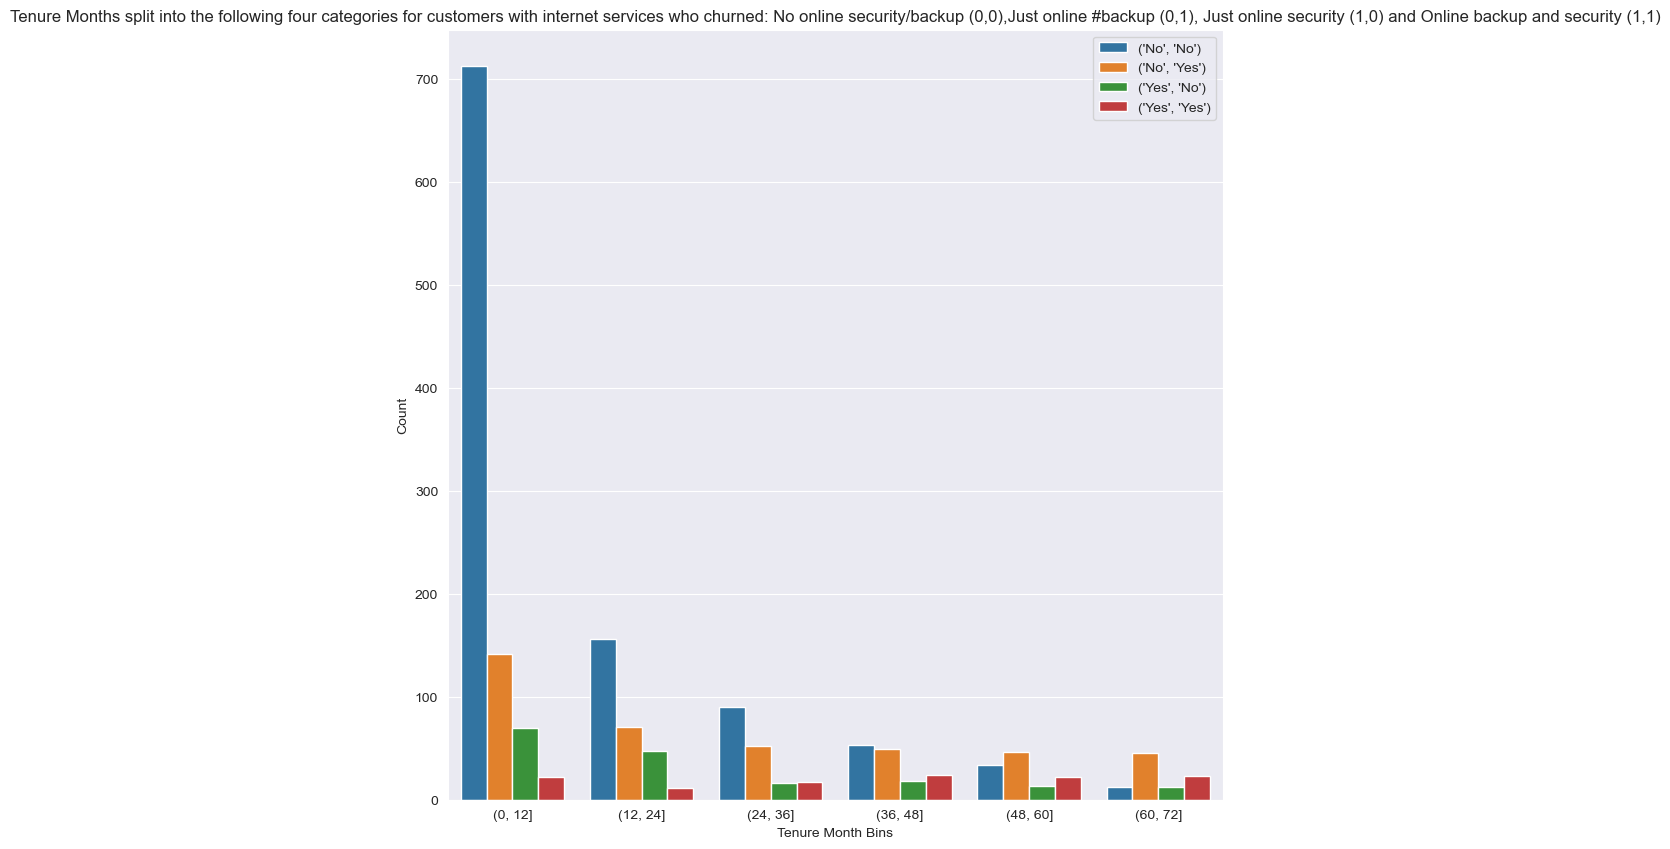

In [34]:
## of people who have internet, do who stream tv/movies WHO HAVE CHURNED
df_online = df.copy()
df_online = df_online[df_online['Internet Service']!='No']
df_online = df_online[df_online['Churn Value']==1]
df_online = df_online.groupby(['Tenure Months','Online Security','Online Backup'])[['Count']].sum()
df_online.reset_index(inplace=True)

bins = [0, 12, 24, 36, 48, 60, 72]
df_online['Tenure Month Bins'] = pd.cut(df_online['Tenure Months'], bins)

df_online1 = df_online.groupby(['Tenure Month Bins','Online Security','Online Backup'])[['Count']].sum()
df_online1.reset_index(inplace=True)
plt.figure(figsize=(10, 10))
labels=['No Movies or TV', 'Just Movies','Just TV','Movies and TV']
sns.barplot(data=df_online1, x="Tenure Month Bins", y="Count",
            hue=df_online1[['Online Security','Online Backup']].apply(tuple, axis=1))\
            .set(title = 'Tenure Months split into the following four categories for customers with internet services who churned: No online security/backup (0,0),Just online #backup (0,1), Just online security (1,0) and Online backup and security (1,1)')

plt.show()

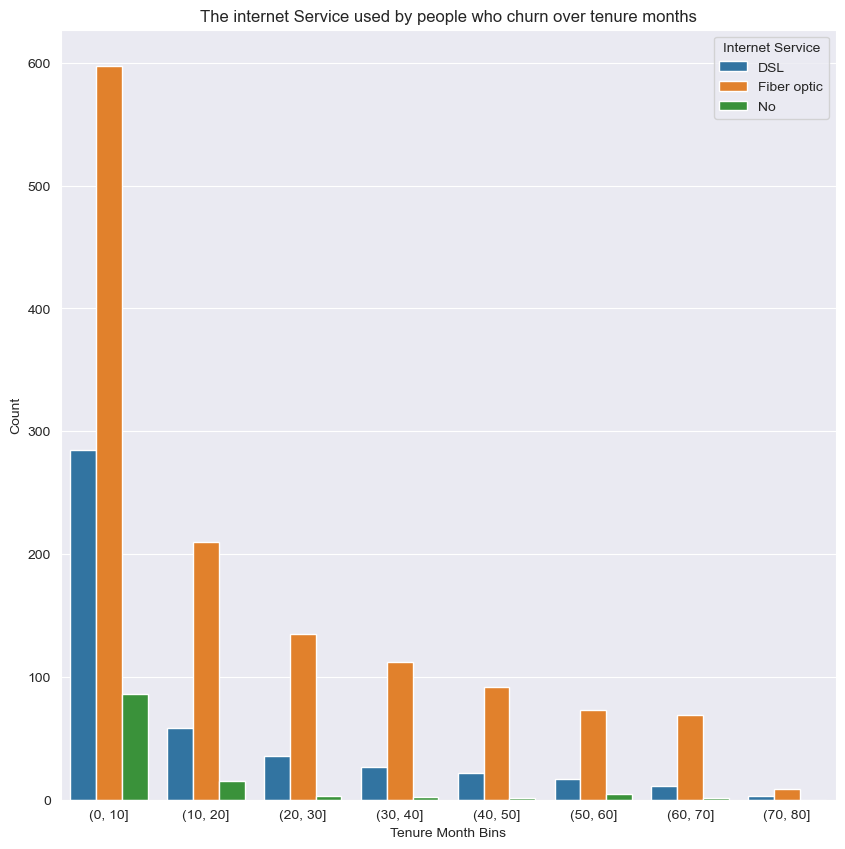

In [35]:
### internet service for poeple who have churned over time
df_int = df.groupby(['Tenure Months', 'Internet Service', 'Churn Value'])[['Count']].sum()
df_int.reset_index(inplace=True)
df_int
df_int = df_int[df_int['Churn Value'] == 1]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df_int['Tenure Month Bins'] = pd.cut(df_int['Tenure Months'], bins)

df_int = df_int.groupby(['Tenure Month Bins', 'Internet Service'])[['Count']].sum()
df_int.reset_index(inplace=True)
plt.figure(figsize=(10, 10))

sns.barplot(data=df_int, x="Tenure Month Bins", y="Count",
            hue='Internet Service').set(title='The internet Service used by people who churn over tenure months')


plt.show()

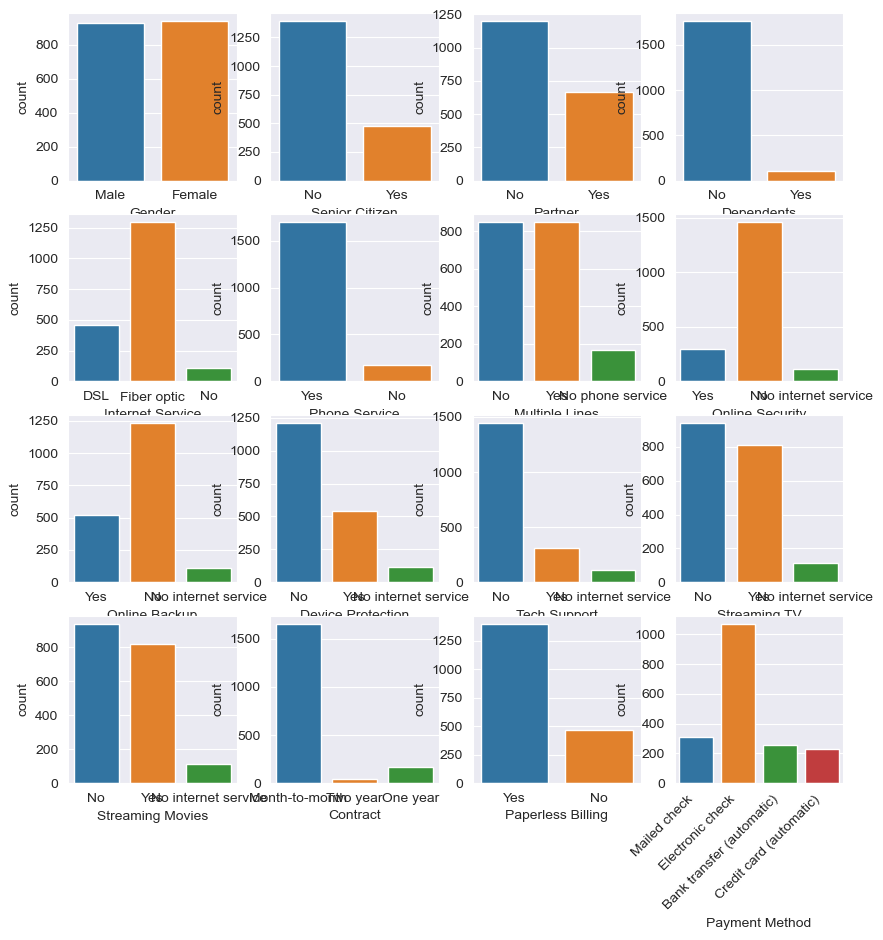

In [36]:
# This produces graphs that count the number of customers who have churned split
#into each human and product demographic

cat_col_list = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Internet Service', 'Phone Service',
                'Multiple Lines', 'Online Security',
                'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
                'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Reason']
plt.figure(figsize=(10, 10))
i = 1
for cat in cat_col_list[:-1]:
    plt.subplot(4, 4, i)
    sns.countplot(x=df[df['Churn Value'] == 1][cat])
    if cat == 'Churn Reason' or cat == 'Payment Method':
        plt.xticks(rotation=45,
                   horizontalalignment='right'
                   )
    i += 1
plt.show()

In [37]:
# Creating a new df containing only customers who have churned

df_churn = df[df['Churn Value'] ==1]

# Creating lists containing grouped reasons for why customers have churned

c_list = ['Competitor made better offer','Competitor had better devices','Competitor offered higher download speeds','Competitor offered more data']
m_list = ['Price too high', 'Lack of affordable download/upload speed','Long distance charges','Extra data charges']
s_list = ['Product dissatisfaction','Service dissatisfaction','Lack of self-service on Website','Network reliability','Limited range of services']
sup_list = ['Poor expertise of online support','Poor expertise of phone support','Attitude of service provider','Attitude of support person']
na_list = ["Don't Know", 'Moved', 'Deceased']

In [38]:
# This function is what will be applied to the 'cat' column in order to group the
# churn reasons together, while keeping the original 'churn reason' column intact

def churn_bins(x):
    if x in c_list:
        return 'Competitor'
    elif x in m_list:
        return 'Financial'
    elif x in s_list:
        return 'Service'
    elif x in sup_list:
        return 'Support'
    else:
        return 'Can not be helped'

C:\Users\wdre6\AppData\Local\Temp\ipykernel_11180\3132565888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['category'] = df_churn['Churn Reason'].apply(churn_bins)


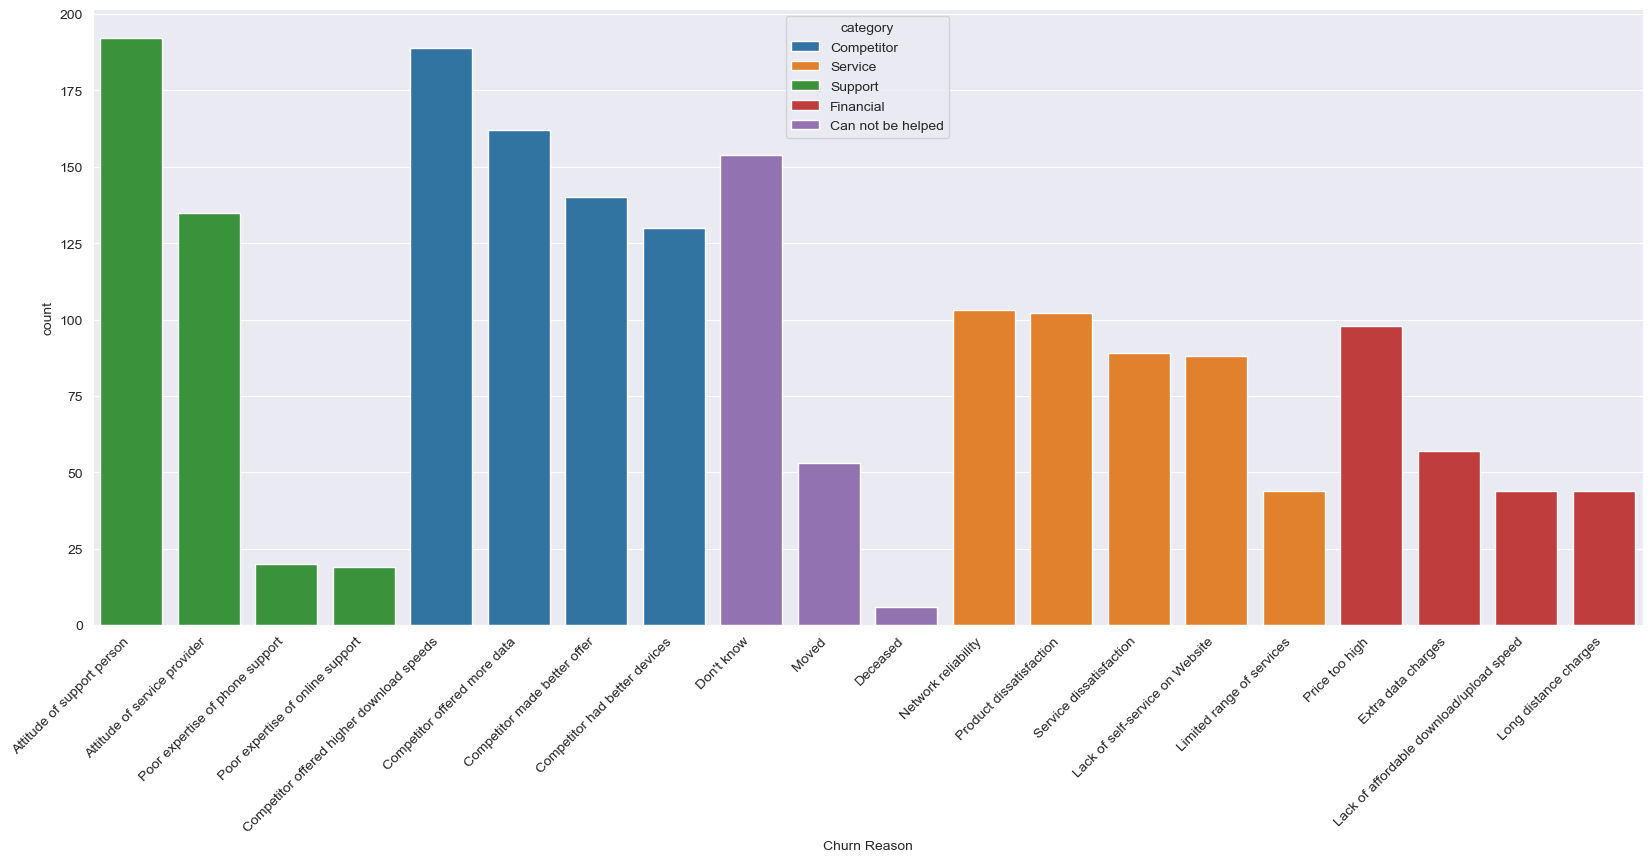

In [44]:
# Creating a new column that will put all the churn reasons into bins in order to
# try to see a different picture of why people may be churning

df_churn['category'] = df_churn['Churn Reason'].apply(churn_bins)

# Bar chart to show the number of each churn reason with their associated groups

plt.figure(figsize = (20,8))
sns.countplot(data=df_churn, x ='Churn Reason', hue='category', dodge=False,
              order=['Attitude of support person','Attitude of service provider','Poor expertise of phone support','Poor expertise of online support',
                     'Competitor offered higher download speeds','Competitor offered more data','Competitor made better offer','Competitor had better devices',
                     'Don\'t know', 'Moved', 'Deceased','Network reliability','Product dissatisfaction','Service dissatisfaction','Lack of self-service on Website',
                     'Limited range of services','Price too high','Extra data charges','Lack of affordable download/upload speed','Long distance charges'],
              hue_order=df_churn['category'].value_counts().index)
plt.xticks(rotation = 45, horizontalalignment='right')
plt.savefig('churnreason.png', dpi=300, bbox_inches='tight', transparent = True)
plt.show()



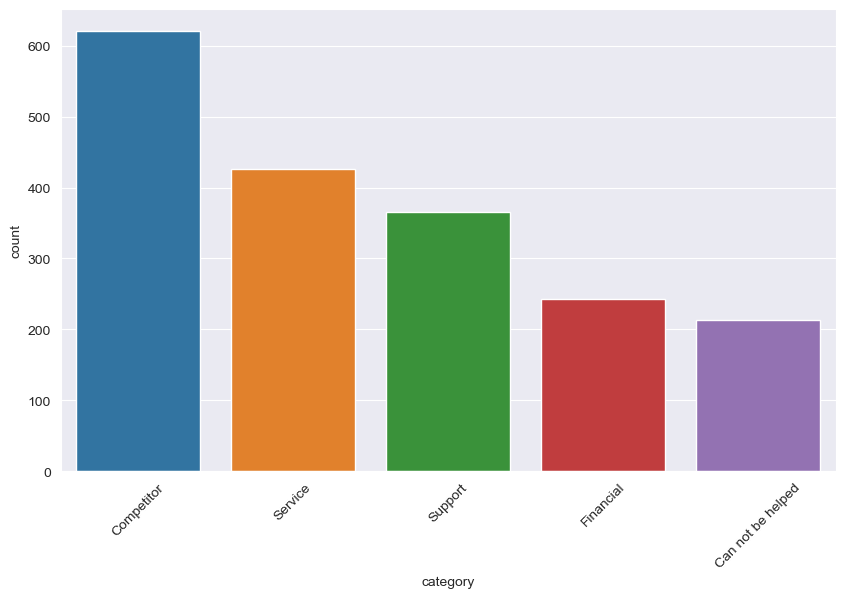

In [43]:
# This graph paints a slightly different picture to the previous, both should be used in
# conjunction with one another

plt.figure(figsize = (10,6))
sns.countplot(data = df_churn, x = 'category', order=['Competitor','Service','Support','Financial','Can not be helped'])
plt.xticks(rotation = 45)
plt.savefig('churnreasoncat.png', dpi=300, bbox_inches='tight', transparent =True)
plt.show()
#plt.savefig('catplot.png', dpi=500, format=None, bbox_inches='tight', metadata = None)

EDA on Geographical data

In [41]:
# The imported gpd package allows for a geo pandas Data Frame which incorporates the spatial domain.
# The point package allows the latitude and longitude to be converted into their corresponding
# spatial regions. This then allows for a spatial join feature from geopandas to be applied where the point data
# generated from the Swan Teleco data is filtered and placed into which Californian county it lies (using another geo dataframe).
# Allowing for regional choropleth maps to be produced.

geometry = [Point(xy) for xy in zip(df_churn.Longitude, df_churn.Latitude)]


gdf_churn = gpd.GeoDataFrame(df_churn, geometry=geometry)counties = gpd.read_file('tl_2022_us_county.shp')

gdf_churn = gdf_churn.set_crs('epsg:4269',allow_override=True)

test_gdy = gpd.sjoin(counties,gdf_churn)


fig, ax1 = plt.subplots(1, figsize=(10, 10))

plt.title('Mean Monthly Charges per churned customer', fontsize=20)  #provide a title

test_gdy.plot(column='Monthly Charges',cmap='Reds',edgecolor='grey',
              legend=True,linewidth=0.1,scheme='stdmean',
              ax=ax1)

gdf_churn.plot(legend=True,markersize=1, alpha=0.3, ax=ax1)

ax1.axis('off') #don't plot the grid lines and background of the image for a smother unbounded look

ax1.annotate('Source: United States Census Bureau (20202)',
             xy=(0.05, 0.1), xycoords='figure fraction',
             horizontalalignment='left', verticalalignment='top',
             fontsize=12, color='#555555')  #adding reference to the data used to retrieve the county lines

plt.savefig('duck123.png',dpi=300, format=None, metadata=None,
            bbox_inches='tight')

SyntaxError: invalid syntax (3151062900.py, line 10)